In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import scipy
from scipy import stats
import statsmodels.api as sm
### Statistical Normality Tests
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import statistics
from statistics import variance 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.stats.multicomp
from scipy.stats import chisquare
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

A hospital wants to determine whether there is any difference in the average Turn
Around Time (TAT) of reports of the laboratories on their preferred list. They
collected a random sample and recorded TAT for reports of 4 laboratories. TAT is
defined as sample collected to report dispatch.
 Analyze the data and determine whether there is any difference in average TAT
among the different laboratories at 5% significance level.

Ho=There is a difference in average TAT among the different laboratories

H1=There is no difference in average TAT among the different laboratories

In [18]:
Data=pd.read_csv("labTAT.CSV")
Data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [16]:
Data.isnull().sum()
Data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


Check weather the Sample data is normally distributed or not
with the help of shapiro Test



In [8]:
#normality test
stat,p=shapiro(cut)

In [17]:
stat, p = shapiro(Data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.995, p=0.118


As we got P=0.118, p>0.05 hence we can accept null hypothesis.From the above snippet of code, we see that the p-value is >0.05 i.e,0.118>0.05 for all density groups. Hence, we can conclude that they follow the Gaussian Distribution.



 Ho=There is a difference in average TAT among the different laboratories
 
H1=There is no difference in average TAT among the different laboratories

# One-Way ANOVA Test using statsmodels module

In [19]:
stats.f_oneway(Data["Laboratory 1"],Data["Laboratory 2"],Data["Laboratory 3"],Data["Laboratory 4"])
 

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#We see that p-value <0.05. Hence, we can reject the Null Hypothesis – there are no differences among different groups P value=2.1156708949992414e-57,p<0.05,P low , fail to accept null hypothesis , what alternate hypothesis says "Average turn around time of all 4 laboratories are not same"

CONCLUSION: Hence statistically Proved that Average turn around time of all 4 laboratories are not same



# Homogeneity of Variance Assumption check

In [22]:
# Levene variance test, Method 2
stats.levene(Data["Laboratory 1"],Data["Laboratory 2"],Data["Laboratory 3"],Data["Laboratory 4"])

LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)

In [23]:
df_a = pd.melt(Data.reset_index(), id_vars=['index'],
    value_vars=['Laboratory 1', 'Laboratory 2', 'Laboratory 3','Laboratory 4'])
df_a

,index,variable,value
0,0,Laboratory 1,185.35
1,1,Laboratory 1,170.49
2,2,Laboratory 1,192.77
3,3,Laboratory 1,177.33
4,4,Laboratory 1,193.41
...,...,...,...
475,115,Laboratory 4,172.68
476,116,Laboratory 4,177.64
477,117,Laboratory 4,170.27
478,118,Laboratory 4,150.87


In [24]:
df_a.columns = ['index', 'treatments', 'value']
df_a.columns

Index(['index', 'treatments', 'value'], dtype='object')

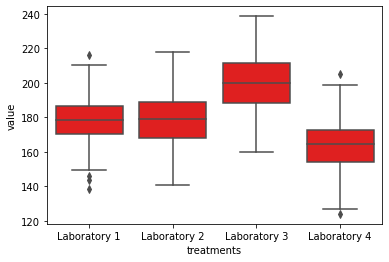

In [25]:
ax = sns.boxplot(x='treatments', y='value', data=df_a, color='red')

In [26]:
model = ols('value ~ C(treatments)', data=df_a).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),79979.167089,3.0,118.704217,2.115671e-57
Residual,106904.608903,476.0,NaN,NaN


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.12e-57
Time:                        12:38:21   Log-Likelihood:                -1978.5
No. Observations:                 480   AIC:                             3965.
Df Residuals:                     476   BIC:                             3982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       178.3616      1.368    130.376      0.000     175.673     181.050
C(treatments)[T.Laboratory 2]     0.5413      1.935      0.280      0.780      -3.260       4.343
C(treatments)[T.Laboratory 3]    21.5517      1.935     11.139      0.000      17.750      25.353
C(treatments)[T.Laboratory 4]   -14.6788      1.935     -7.587      0.000     -18.480     -10.877
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.044
Skew:                          -0.002   Prob(JB):                        0.978
Kurtosis:                       3.047   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 476) =  118.704, p =  0.0000


In [29]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(treatments),79979.167089,3.0,118.704217,2.115671e-57
Residual,106904.608903,476.0,NaN,NaN



The F-statistic= 118.704 and the p-value= 0.002 which is indicating that there is an overall significant effect of treaments on laboratories. However, we don’t know where the difference between treatments is yet. So, based on the p-value we can reject the H0; that is there’s no significant difference as per treatments

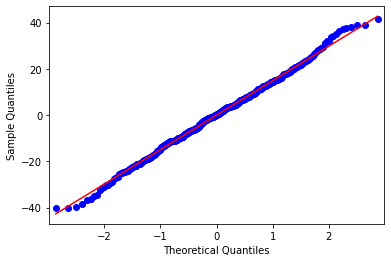

In [30]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

From the above figure, we see that all data points lie to close to the 45-degree line and hence we can conclude that it follows Normal Distribution.

# When we conduct an ANOVA, we are attempting to determine if there is a statistically significant difference among the groups. So what if we find statistical significance?
If we find that there is a difference, we will then need to examine where the group differences lay. So, we’ll use the Tukey HSD test to identify where the difference lies

In [31]:
mc = statsmodels.stats.multicomp.MultiComparison(df_a['value'],df_a['treatments'])
mc_results = mc.tukeyhsd()
print(mc_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
Laboratory 1 Laboratory 2   0.5413   0.9  -4.4468   5.5294  False
Laboratory 1 Laboratory 3  21.5517 0.001  16.5636  26.5398   True
Laboratory 1 Laboratory 4 -14.6788 0.001 -19.6669  -9.6907   True
Laboratory 2 Laboratory 3  21.0103 0.001  16.0222  25.9984   True
Laboratory 2 Laboratory 4 -15.2202 0.001 -20.2083 -10.2321   True
Laboratory 3 Laboratory 4 -36.2305 0.001 -41.2186 -31.2424   True
-----------------------------------------------------------------


Tuckey HSD test clearly says that there’s a significant difference between Group1 – Group2